# Calendar Data EDA Analysis
## Exploratory Data Analysis for Calendar and Temporal Features

This notebook analyzes the cleaned calendar data to understand temporal patterns, seasonality, and date-related features that influence product demand.

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

In [14]:
# Load the cleaned calendar data
df = pd.read_csv("../data/processed/calender_data_cleaned.csv")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (366, 4)
Columns: ['Date', 'IsWeekend', 'Season', 'DayType']


,Date,IsWeekend,Season,DayType
0,2024-01-01,No,Winter,Weekday
1,2024-01-02,No,Winter,Weekday
2,2024-01-03,No,Winter,Weekday
3,2024-01-04,No,Winter,Weekday
4,2024-01-05,No,Winter,Weekday


In [15]:
# Basic information about the dataset
print("DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
print(df.nunique())

DATASET OVERVIEW
Shape: (366, 4)
Memory usage: 0.08 MB

Data Types:
Date         object
IsWeekend    object
Season       object
DayType      object
dtype: object

Missing Values:
Date         0
IsWeekend    0
Season       0
DayType      0
dtype: int64

Unique Values:
Date         366
IsWeekend      2
Season         4
DayType        3
dtype: int64


In [16]:
# Convert date column to datetime if needed
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
elif 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Display basic statistics
df.describe(include='all')

,Date,IsWeekend,Season,DayType
count,366,366,366,366
unique,NaN,2,4,3
top,NaN,No,Spring,Weekday
freq,NaN,262,92,255
mean,2024-07-01 12:00:00.000000256,NaN,NaN,NaN
min,2024-01-01 00:00:00,NaN,NaN,NaN
25%,2024-04-01 06:00:00,NaN,NaN,NaN
50%,2024-07-01 12:00:00,NaN,NaN,NaN
75%,2024-09-30 18:00:00,NaN,NaN,NaN
max,2024-12-31 00:00:00,NaN,NaN,NaN


## Temporal Analysis

In [17]:
# Create additional temporal features for analysis
date_col = 'Date' if 'Date' in df.columns else 'date'

if date_col in df.columns:
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['Day'] = df[date_col].dt.day
    df['DayOfWeek'] = df[date_col].dt.dayofweek
    df['DayOfYear'] = df[date_col].dt.dayofyear
    df['Week'] = df[date_col].dt.isocalendar().week
    df['Quarter'] = df[date_col].dt.quarter
    
    print(f"Date range: {df[date_col].min()} to {df[date_col].max()}")
    print(f"Total days: {(df[date_col].max() - df[date_col].min()).days + 1}")

Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
Total days: 366


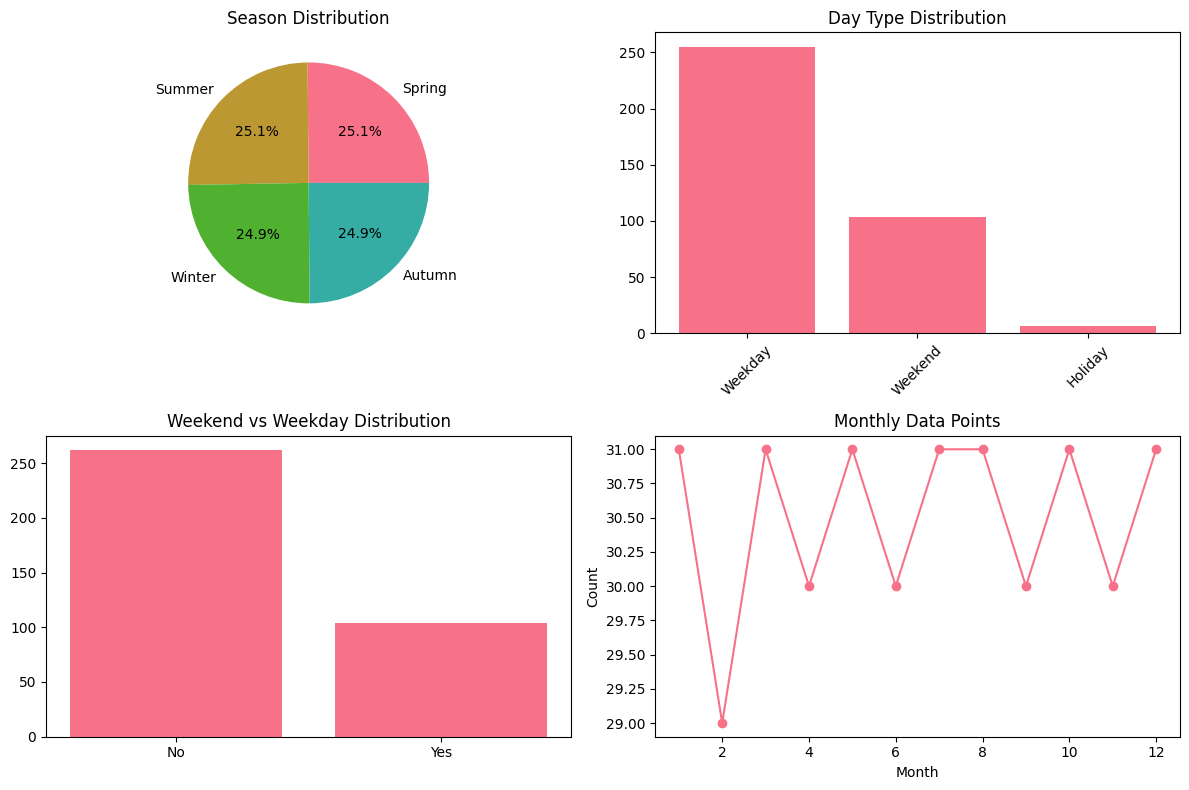

In [18]:
# Seasonal distribution
if 'Season' in df.columns:
    plt.figure(figsize=(12, 8))
    
    # Season distribution
    plt.subplot(2, 2, 1)
    season_counts = df['Season'].value_counts()
    plt.pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%')
    plt.title('Season Distribution')
    
    # Day type distribution
    if 'DayType' in df.columns:
        plt.subplot(2, 2, 2)
        daytype_counts = df['DayType'].value_counts()
        plt.bar(daytype_counts.index, daytype_counts.values)
        plt.title('Day Type Distribution')
        plt.xticks(rotation=45)
    
    # Weekend distribution
    if 'IsWeekend' in df.columns:
        plt.subplot(2, 2, 3)
        weekend_counts = df['IsWeekend'].value_counts()
        plt.bar(weekend_counts.index, weekend_counts.values)
        plt.title('Weekend vs Weekday Distribution')
    
    # Monthly distribution
    if 'Month' in df.columns:
        plt.subplot(2, 2, 4)
        month_counts = df['Month'].value_counts().sort_index()
        plt.plot(month_counts.index, month_counts.values, marker='o')
        plt.title('Monthly Data Points')
        plt.xlabel('Month')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

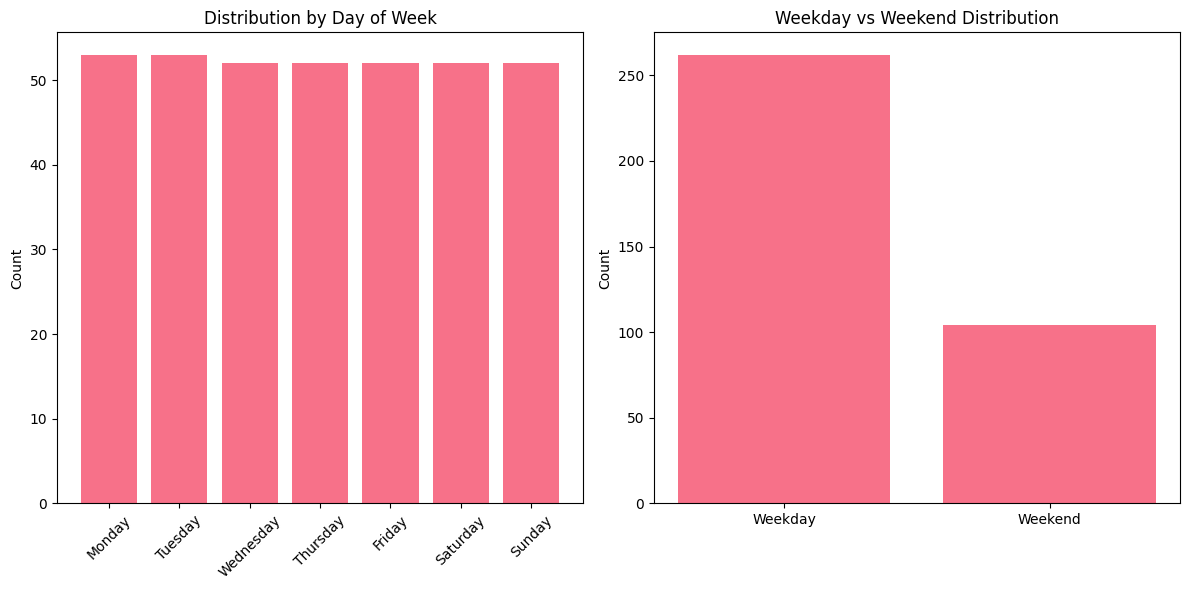

In [19]:
# Day of week analysis
if 'DayOfWeek' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Day of week distribution
    plt.subplot(1, 2, 1)
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_counts = df['DayOfWeek'].value_counts().sort_index()
    plt.bar(range(7), dow_counts.values)
    plt.xticks(range(7), day_names, rotation=45)
    plt.title('Distribution by Day of Week')
    plt.ylabel('Count')
    
    # Weekend vs weekday comparison
    plt.subplot(1, 2, 2)
    weekend_data = df[df['DayOfWeek'].isin([5, 6])]
    weekday_data = df[df['DayOfWeek'].isin([0, 1, 2, 3, 4])]
    
    plt.bar(['Weekday', 'Weekend'], [len(weekday_data), len(weekend_data)])
    plt.title('Weekday vs Weekend Distribution')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

## Interactive Visualizations

In [20]:
# Interactive calendar heatmap if date data is available
if date_col in df.columns and 'Month' in df.columns:
    # Create a count of data points by month and day
    calendar_data = df.groupby(['Month', 'Day']).size().reset_index(name='Count')
    
    # Create heatmap
    fig = px.density_heatmap(
        calendar_data, 
        x='Day', 
        y='Month', 
        z='Count',
        title='Calendar Data Distribution Heatmap',
        labels={'Count': 'Number of Records'}
    )
    fig.show()

In [21]:
# Seasonal patterns over time
if 'Season' in df.columns and date_col in df.columns:
    seasonal_timeline = df.groupby([df[date_col].dt.to_period('M'), 'Season']).size().unstack(fill_value=0)
    
    fig = go.Figure()
    for season in seasonal_timeline.columns:
        fig.add_trace(go.Scatter(
            x=seasonal_timeline.index.astype(str),
            y=seasonal_timeline[season],
            mode='lines+markers',
            name=season,
            line=dict(width=2)
        ))
    
    fig.update_layout(
        title='Seasonal Patterns Over Time',
        xaxis_title='Month',
        yaxis_title='Count',
        hovermode='x unified'
    )
    fig.show()

## Summary Statistics and Insights

In [22]:
# Summary insights
print("CALENDAR DATA INSIGHTS")

if 'Season' in df.columns:
    print("\n📅 SEASONAL ANALYSIS:")
    season_summary = df['Season'].value_counts()
    for season, count in season_summary.items():
        print(f"   {season}: {count} days ({count/len(df)*100:.1f}%)")

if 'IsWeekend' in df.columns:
    print("\n📊 WEEKEND ANALYSIS:")
    weekend_summary = df['IsWeekend'].value_counts()
    for day_type, count in weekend_summary.items():
        print(f"   {day_type}: {count} days ({count/len(df)*100:.1f}%)")

if 'DayType' in df.columns:
    print("\n🗓️ DAY TYPE ANALYSIS:")
    daytype_summary = df['DayType'].value_counts()
    for day_type, count in daytype_summary.items():
        print(f"   {day_type}: {count} days ({count/len(df)*100:.1f}%)")

if date_col in df.columns:
    print(f"\n📈 TEMPORAL COVERAGE:")
    print(f"   Start Date: {df[date_col].min().strftime('%Y-%m-%d')}")
    print(f"   End Date: {df[date_col].max().strftime('%Y-%m-%d')}")
    print(f"   Total Days: {len(df)} days")
    print(f"   Date Range: {(df[date_col].max() - df[date_col].min()).days + 1} days")

print("\n" + "="*60)

CALENDAR DATA INSIGHTS

📅 SEASONAL ANALYSIS:
   Spring: 92 days (25.1%)
   Summer: 92 days (25.1%)
   Winter: 91 days (24.9%)
   Autumn: 91 days (24.9%)

📊 WEEKEND ANALYSIS:
   No: 262 days (71.6%)
   Yes: 104 days (28.4%)

🗓️ DAY TYPE ANALYSIS:
   Weekday: 255 days (69.7%)
   Weekend: 104 days (28.4%)
   Holiday: 7 days (1.9%)

📈 TEMPORAL COVERAGE:
   Start Date: 2024-01-01
   End Date: 2024-12-31
   Total Days: 366 days
   Date Range: 366 days



In [23]:
# Data quality assessment
print("DATA QUALITY ASSESSMENT")


# Check for missing values
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values found")
else:
    print("⚠️ Missing values detected:")
    for col, missing in missing_data[missing_data > 0].items():
        print(f"   {col}: {missing} ({missing/len(df)*100:.1f}%)")

# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("✅ No duplicate rows found")
else:
    print(f"⚠️ {duplicates} duplicate rows found")

# Check data consistency
print("\n📊 DATA CONSISTENCY:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_count = df[col].nunique()
        print(f"   {col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"      Values: {list(df[col].unique())}")

DATA QUALITY ASSESSMENT
✅ No missing values found
✅ No duplicate rows found

📊 DATA CONSISTENCY:
   IsWeekend: 2 unique values
      Values: ['No', 'Yes']
   Season: 4 unique values
      Values: ['Winter', 'Spring', 'Summer', 'Autumn']
   DayType: 3 unique values
      Values: ['Weekday', 'Weekend', 'Holiday']
